In [1]:
import pandas as pd
df = pd.read_csv("/content/Impact_of_Remote_Work_on_Mental_Health (1).csv")
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df_= df.drop(df.columns[0:9], axis=1)
df_= df_.drop(df_.columns[2:11], axis=1)
df_.head()

,Work_Life_Balance_Rating,Stress_Level
0,2,Medium
1,1,Medium
2,5,Medium
3,4,High
4,2,High


In [4]:
encode = OneHotEncoder(sparse_output=False)
one_hot_encoded = encode.fit_transform(df_['Stress_Level'].values.reshape(-1, 1))

encode_df = pd.DataFrame(one_hot_encoded, columns=encode.get_feature_names_out(['Stress_Level']))

df_encoded = pd.concat([df_, encode_df], axis=1)

df_encoded = df_encoded.drop('Stress_Level', axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
      Work_Life_Balance_Rating  Stress_Level_High  Stress_Level_Low  \
0                            2                0.0               0.0   
1                            1                0.0               0.0   
2                            5                0.0               0.0   
3                            4                1.0               0.0   
4                            2                1.0               0.0   
...                        ...                ...               ...   
4995                         5                1.0               0.0   
4996                         1                0.0               1.0   
4997                         4                1.0               0.0   
4998                         5                0.0               1.0   
4999                         1                0.0               1.0   

      Stress_Level_Medium  
0                     1.0  
1                     1.0  
2                     1.0  
3         

In [5]:
stress = ['Stress_Level_Low', 'Stress_Level_Medium', 'Stress_Level_High']
y = df_encoded.loc[:, stress]
y = np.argmax(y.values, axis=1)
X = df_encoded.loc[:,['Work_Life_Balance_Rating']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0, random_state=42)
model_multinomial.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

In [36]:
y_pred = model_multinomial.predict(X_test)
print(y_pred)

[2 2 2 ... 2 2 1]


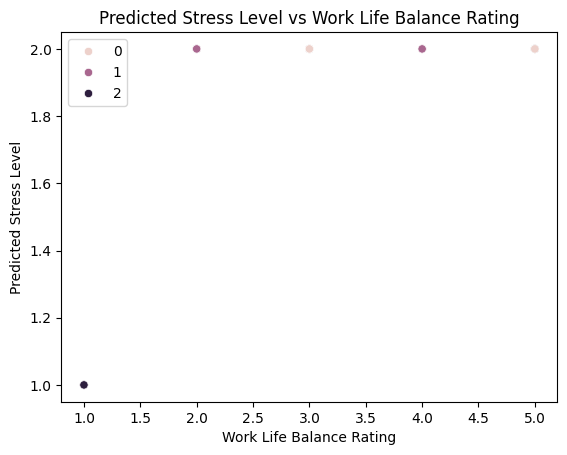

In [24]:
y_pred = y_pred.squeeze()
x_test_view = X_test['Work_Life_Balance_Rating'].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Work Life Balance Rating')
plt.ylabel('Predicted Stress Level')
plt.title('Predicted Stress Level vs Work Life Balance Rating')
plt.legend()

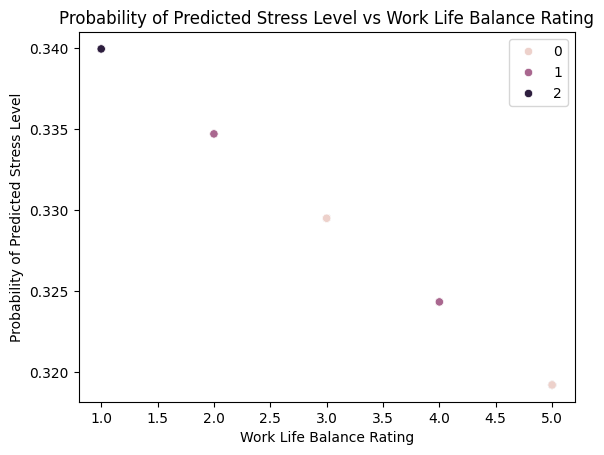

In [37]:
y_prob = model_multinomial.predict_proba(X_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)
plt.xlabel('Work Life Balance Rating')
plt.ylabel('Probability of Predicted Stress Level')
plt.title('Probability of Predicted Stress Level vs Work Life Balance Rating')
plt.legend()

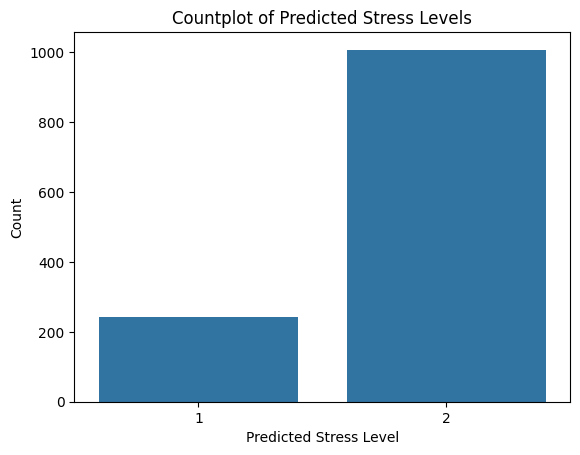

In [33]:
sns.countplot(x=y_pred)
plt.xlabel('Predicted Stress Level')
plt.ylabel('Count')
plt.title('Countplot of Predicted Stress Levels')
plt.show()

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3568


In [28]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       408
           1       0.41      0.23      0.29       433
           2       0.34      0.85      0.49       409

    accuracy                           0.36      1250
   macro avg       0.25      0.36      0.26      1250
weighted avg       0.25      0.36      0.26      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
model_multinomial.predict(X_test[0:10])

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2])

In [12]:
model_multinomial.predict_proba(X_test[0:10])

array([[0.3299058 , 0.32950709, 0.34058711],
       [0.33635238, 0.31922944, 0.34441819],
       [0.33635238, 0.31922944, 0.34441819],
       [0.32342203, 0.33994666, 0.33663131],
       [0.33635238, 0.31922944, 0.34441819],
       [0.33313404, 0.32434755, 0.34251841],
       [0.33635238, 0.31922944, 0.34441819],
       [0.32666827, 0.33470712, 0.33862462],
       [0.32342203, 0.33994666, 0.33663131],
       [0.33635238, 0.31922944, 0.34441819]])

In [19]:
print(confusion_matrix(y_test, y_pred))

[[  0  82 326]
 [  0  99 334]
 [  0  62 347]]


One vs All

In [30]:
from sklearn.multiclass import OneVsRestClassifier
ova = OneVsRestClassifier(LogisticRegression())
ova.fit(X_train, y_train)
ova.predict(X_test[0:10])

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2])

In [31]:
ova.predict_proba(X_test[0:10])

array([[0.32989561, 0.32953999, 0.34056441],
       [0.33633702, 0.31925133, 0.34441166],
       [0.33633702, 0.31925133, 0.34441166],
       [0.32343321, 0.33991504, 0.33665174],
       [0.33633702, 0.31925133, 0.34441166],
       [0.33311945, 0.32438404, 0.34249651],
       [0.33633702, 0.31925133, 0.34441166],
       [0.32666651, 0.33471754, 0.33861594],
       [0.32343321, 0.33991504, 0.33665174],
       [0.33633702, 0.31925133, 0.34441166]])

In [32]:
ova.score(X_test, y_test)

0.3568

One Vs One

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
ovo.predict(X_test[0:10])

array([0, 2, 1, 1, 2, 2, 2, 1, 1, 0])

In [ ]:
ovo.score(X_test, y_test)

0.328